We want to plot the quantiles of when the most emails where sent (per person) as scatter plots like in exp008. However, this time we want to do this by month to see if trends can be seen. Additionally, we want to calculate the average of each month and then subtract the 75th quantile from the 25th of this average to get span of time that is related to the duration of a work day (given that the relative amount of emails sent at work and after/before work stays the same). We then plot this time against time to see if there are trends visible.

In [18]:
%run ../src/parse_mails.py
import matplotlib.pyplot as plt

df = parse_maildir("../data/maildir")
df

,name,date,parsed_date,time,day,tz
../data/maildir/tycholiz-b/sent_items/155.,tycholiz-b,"Date: Fri, 12 Oct 2001 10:57:02 -0700 (PDT)\n",2001-10-12 10:57:02-07:00,10:57:02,2001-10-12,PDT
../data/maildir/tycholiz-b/sent_items/113.,tycholiz-b,"Date: Fri, 28 Sep 2001 09:36:02 -0700 (PDT)\n",2001-09-28 09:36:02-07:00,09:36:02,2001-09-28,PDT
../data/maildir/tycholiz-b/sent_items/408.,tycholiz-b,"Date: Tue, 6 Nov 2001 07:13:09 -0800 (PST)\n",2001-11-06 07:13:09-08:00,07:13:09,2001-11-06,PST
../data/maildir/tycholiz-b/sent_items/247.,tycholiz-b,"Date: Fri, 30 Nov 2001 07:57:29 -0800 (PST)\n",2001-11-30 07:57:29-08:00,07:57:29,2001-11-30,PST
../data/maildir/tycholiz-b/sent_items/216.,tycholiz-b,"Date: Fri, 26 Oct 2001 10:49:36 -0700 (PDT)\n",2001-10-26 10:49:36-07:00,10:49:36,2001-10-26,PDT
...,...,...,...,...,...,...
../data/maildir/dickson-s/sent/85.,dickson-s,"Date: Wed, 11 Apr 2001 04:29:00 -0700 (PDT)\n",2001-04-11 04:29:00-07:00,04:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/3.,dickson-s,"Date: Fri, 9 Mar 2001 01:50:00 -0800 (PST)\n",2001-03-09 01:50:00-08:00,01:50:00,2001-03-09,PST
../data/maildir/dickson-s/sent/81.,dickson-s,"Date: Wed, 11 Apr 2001 02:29:00 -0700 (PDT)\n",2001-04-11 02:29:00-07:00,02:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/38.,dickson-s,"Date: Wed, 28 Mar 2001 03:57:00 -0800 (PST)\n",2001-03-28 03:57:00-08:00,03:57:00,2001-03-28,PST


In [19]:
df["seconds_since_midnight"] = df["time"].apply(lambda x: x.hour * 60 * 60 + x.minute * 60 + x.second)
df["year"] = df["day"].apply(lambda x: x.year)
df["month"] = df["day"].apply(lambda x: x.month)
grouped_times = df.groupby("name")["seconds_since_midnight"].apply(list).reset_index()
grouped_times["25_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .25))
grouped_times["75_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .75))
grouped_times

,name,seconds_since_midnight,25_quantile,75_quantile
0,allen-p,"[48769, 27749, 25375, 20145, 48830, 43647, 195...",15240.00,34500.00
1,arnold-j,"[51927, 23410, 17891, 66000, 35600, 23188, 175...",19740.00,43140.00
2,arora-h,"[23656, 43893, 30997, 28774, 44945, 34114, 452...",33286.00,44940.00
3,badeer-r,"[30223, 32348, 32204, 32922, 32955, 32319, 328...",11850.00,32524.00
4,bailey-s,"[35322, 34236, 47856, 22714, 48862, 47706, 275...",30112.00,47095.25
...,...,...,...,...
143,williams-w3,"[55894, 58104, 65293, 72854, 45427, 64645, 447...",42886.50,65234.50
144,wolfe-j,"[49958, 47650, 34647, 41298, 34124, 43454, 463...",34724.00,47479.00
145,ybarbo-p,"[35093, 55380, 72540, 43180, 55220, 34090, 531...",35651.50,55250.75
146,zipper-a,"[26865, 32966, 21469, 24685, 27963, 39630, 467...",27347.75,44549.25


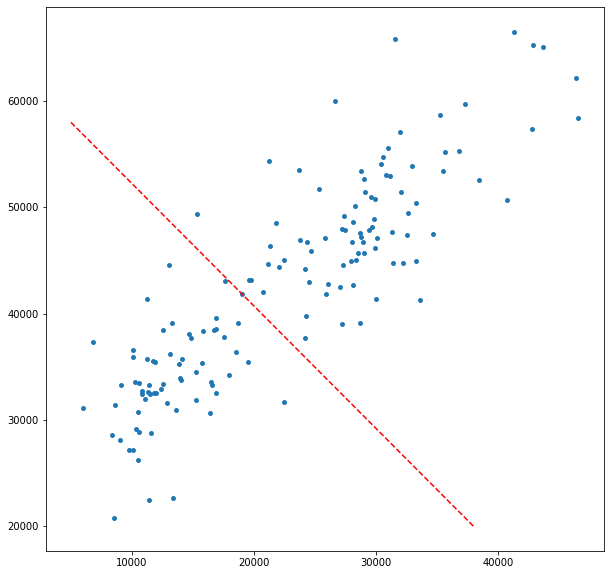

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(grouped_times["25_quantile"], grouped_times["75_quantile"], s=15)
axs.plot(np.linspace(5000, 38000, num=50), np.linspace(20000, 58000, num=50)[::-1], "--", c="red")
plt.show()

In [21]:
def get_data_for_month(year, month):
    df_month = df[(df["year"] == year) & (df["month"] == month)]
    grouped_times = df_month.groupby("name")["seconds_since_midnight"].apply(list).reset_index()
    grouped_times["25_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .25))
    grouped_times["75_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .75))
    quantiles = grouped_times[["25_quantile", "75_quantile"]]
    return (quantiles, (quantiles["25_quantile"].mean(), quantiles["75_quantile"].mean()))

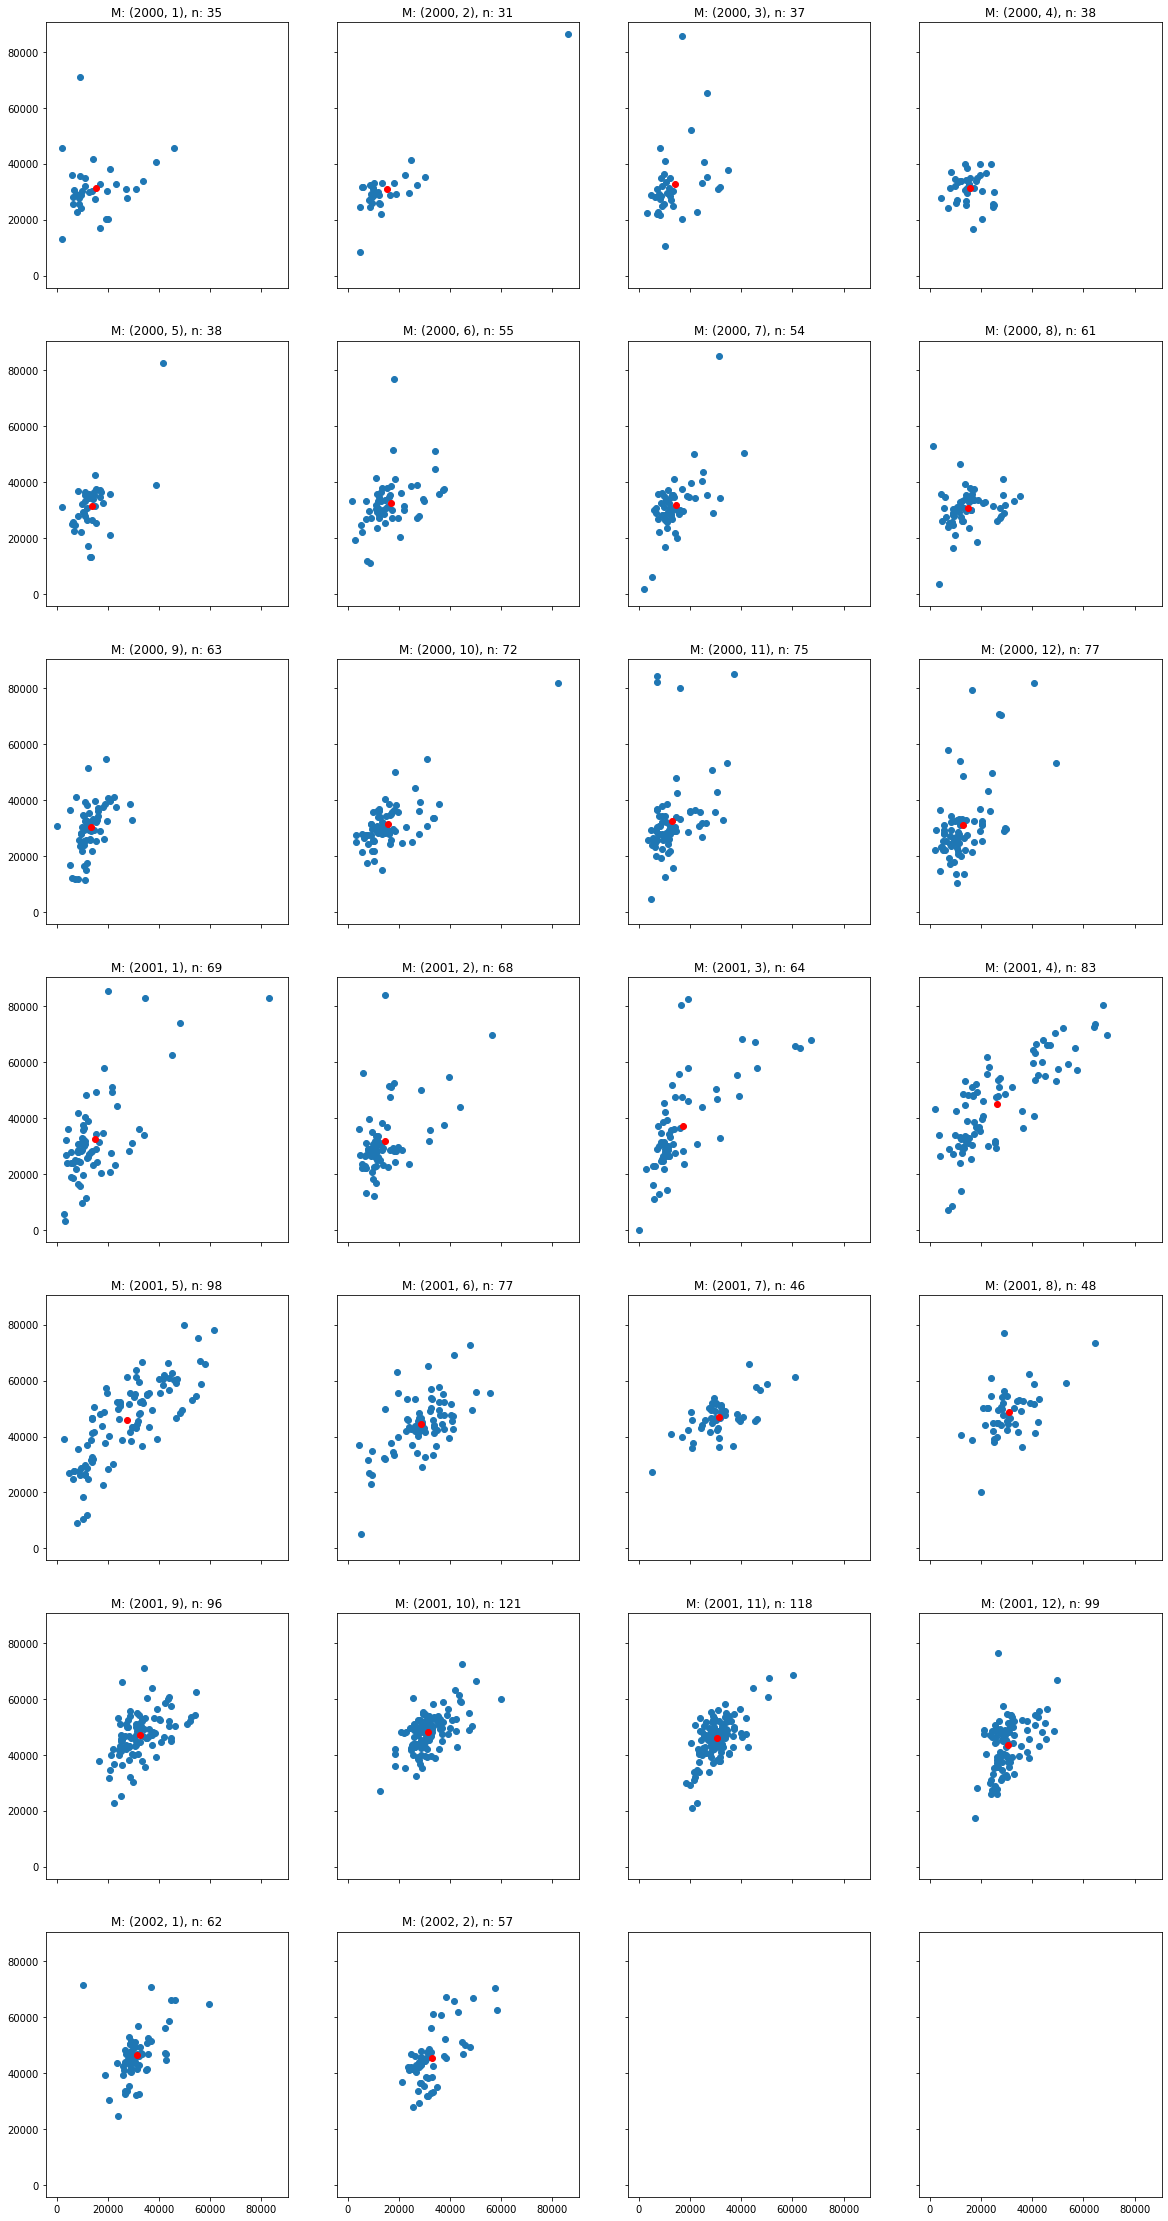

In [22]:
months = [(2000, 1), (2000, 2), (2000, 3), (2000,  4), (2000,  5), (2000,  6), 
          (2000, 7), (2000, 8), (2000, 9), (2000, 10), (2000, 11), (2000, 12),
          (2001, 1), (2001, 2), (2001, 3), (2001,  4), (2001,  5), (2001,  6), 
          (2001, 7), (2001, 8), (2001, 9), (2001, 10), (2001, 11), (2001, 12),
          (2002, 1), (2002, 2)]
avg_work_times = []

fig, axs = plt.subplots(7, 4, figsize=(20, 40), sharex=True, sharey=True)
for i in range(len(months)):
    row = i // 4
    col = i % 4
    quantiles, avg = get_data_for_month(*months[i])
    avg_work_times.append(avg)
    axs[row][col].scatter(quantiles["25_quantile"], quantiles["75_quantile"])
    axs[row][col].scatter([avg[0]], [avg[1]], c="red")
    axs[row][col].set_title(f"M: {months[i]}, n: {len(quantiles)}")

plt.show()

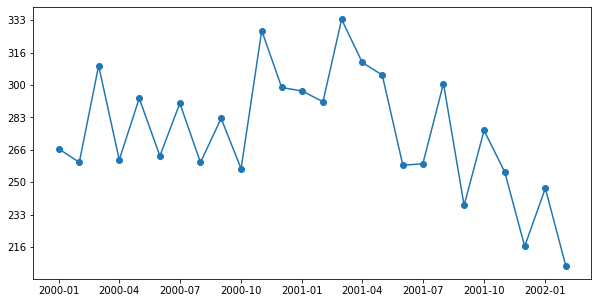

In [6]:
from datetime import datetime
datetime_months = list(map(lambda x: datetime(*x, 1), months))
workday_duration = list(map(lambda x: x[1] - x[0], avg_work_times))

from matplotlib.ticker import FuncFormatter

def seconds_in_minutes(x, pos):
    minutes = x // 60
    return '%d' % (minutes)

formatter = FuncFormatter(seconds_in_minutes)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(datetime_months, workday_duration)
ax.scatter(datetime_months, workday_duration)
ax.yaxis.set_major_formatter(formatter)
plt.show()

There appears to be a slight downward trend in the amount of time that 50% of the emails where sent in.

In [7]:
%run ../src/parse_mails2.py
df2 = parse_maildir2("../data/maildir")
df2

,from,to,subject,date,week,year,month,seconds_since_midnight,hour,minute,second
../data/maildir/taylor-m/all_documents/84.,mark.taylor@enron.com,"jennifer.fraser@enron.com, jeffrey.hodge@enron...",Ormet,1999-01-04 10:21:00+00:00,1,1999,1,37260,10,21,0
../data/maildir/taylor-m/all_documents/85.,mark.taylor@enron.com,tana.jones@enron.com,Ormet,1999-01-04 12:11:00+00:00,1,1999,1,43860,12,11,0
../data/maildir/taylor-m/all_documents/86.,brent.hendry@enron.com,None,Re: Brazilian Transaction Taxes,1999-01-05 06:36:00+00:00,1,1999,1,23760,6,36,0
../data/maildir/taylor-m/all_documents/87.,mark.taylor@enron.com,scott.sefton@enron.com,Re: London Trading Meetings,1999-01-05 12:04:00+00:00,1,1999,1,43440,12,4,0
../data/maildir/taylor-m/all_documents/88.,mark.taylor@enron.com,jenny.helton@enron.com,Re: 1998 ISDA Commodity Derivatives Definitions,1999-01-05 14:54:00+00:00,1,1999,1,53640,14,54,0
...,...,...,...,...,...,...,...,...,...,...,...
../data/maildir/fischer-m/all_documents/428.,denise.williams@enron.com,ge_benefits@enron.com,URGENT!!! CUTOVER WEEKEND,2002-07-12 11:13:00+00:00,28,2002,7,40380,11,13,0
../data/maildir/fischer-m/all_documents/429.,kurt.anderson@enron.com,gverkleeren@zilkha.com,Re: FW: RE: Revised Availability Numbers,2002-07-12 11:36:00+00:00,28,2002,7,41760,11,36,0
../data/maildir/perlingiere-d/calendar/1.,filterpst@enron.com,None,,2002-09-20 22:04:12+00:00,38,2002,9,79452,22,4,12
../data/maildir/dasovich-j/calendar/9.,jeff.dasovich@enron.com,None,Daily Call,2002-09-22 16:42:25+00:00,38,2002,9,60145,16,42,25


                        from  \
56   chris.germany@enron.com   
80    daren.farmer@enron.com   
98     drew.fossum@enron.com   
105      eric.bass@enron.com   
226    mark.taylor@enron.com   

                                seconds_since_midnight  no_mails  25_quantile  \
56   [50280, 52320, 70380, 36480, 49980, 59820, 556...       134      42585.0   
80   [58500, 26220, 26580, 41160, 51060, 53160, 559...        60      38205.0   
98   [37080, 42780, 43680, 43860, 44940, 62580, 306...        68      36270.0   
105  [47400, 56340, 52620, 56460, 57660, 68160, 293...        84      37425.0   
226  [30420, 38340, 65040, 57540, 65400, 32700, 363...        88      37305.0   

     75_quantile  
56       70365.0  
80       58455.0  
98       58080.0  
105      57720.0  
226      56370.0  


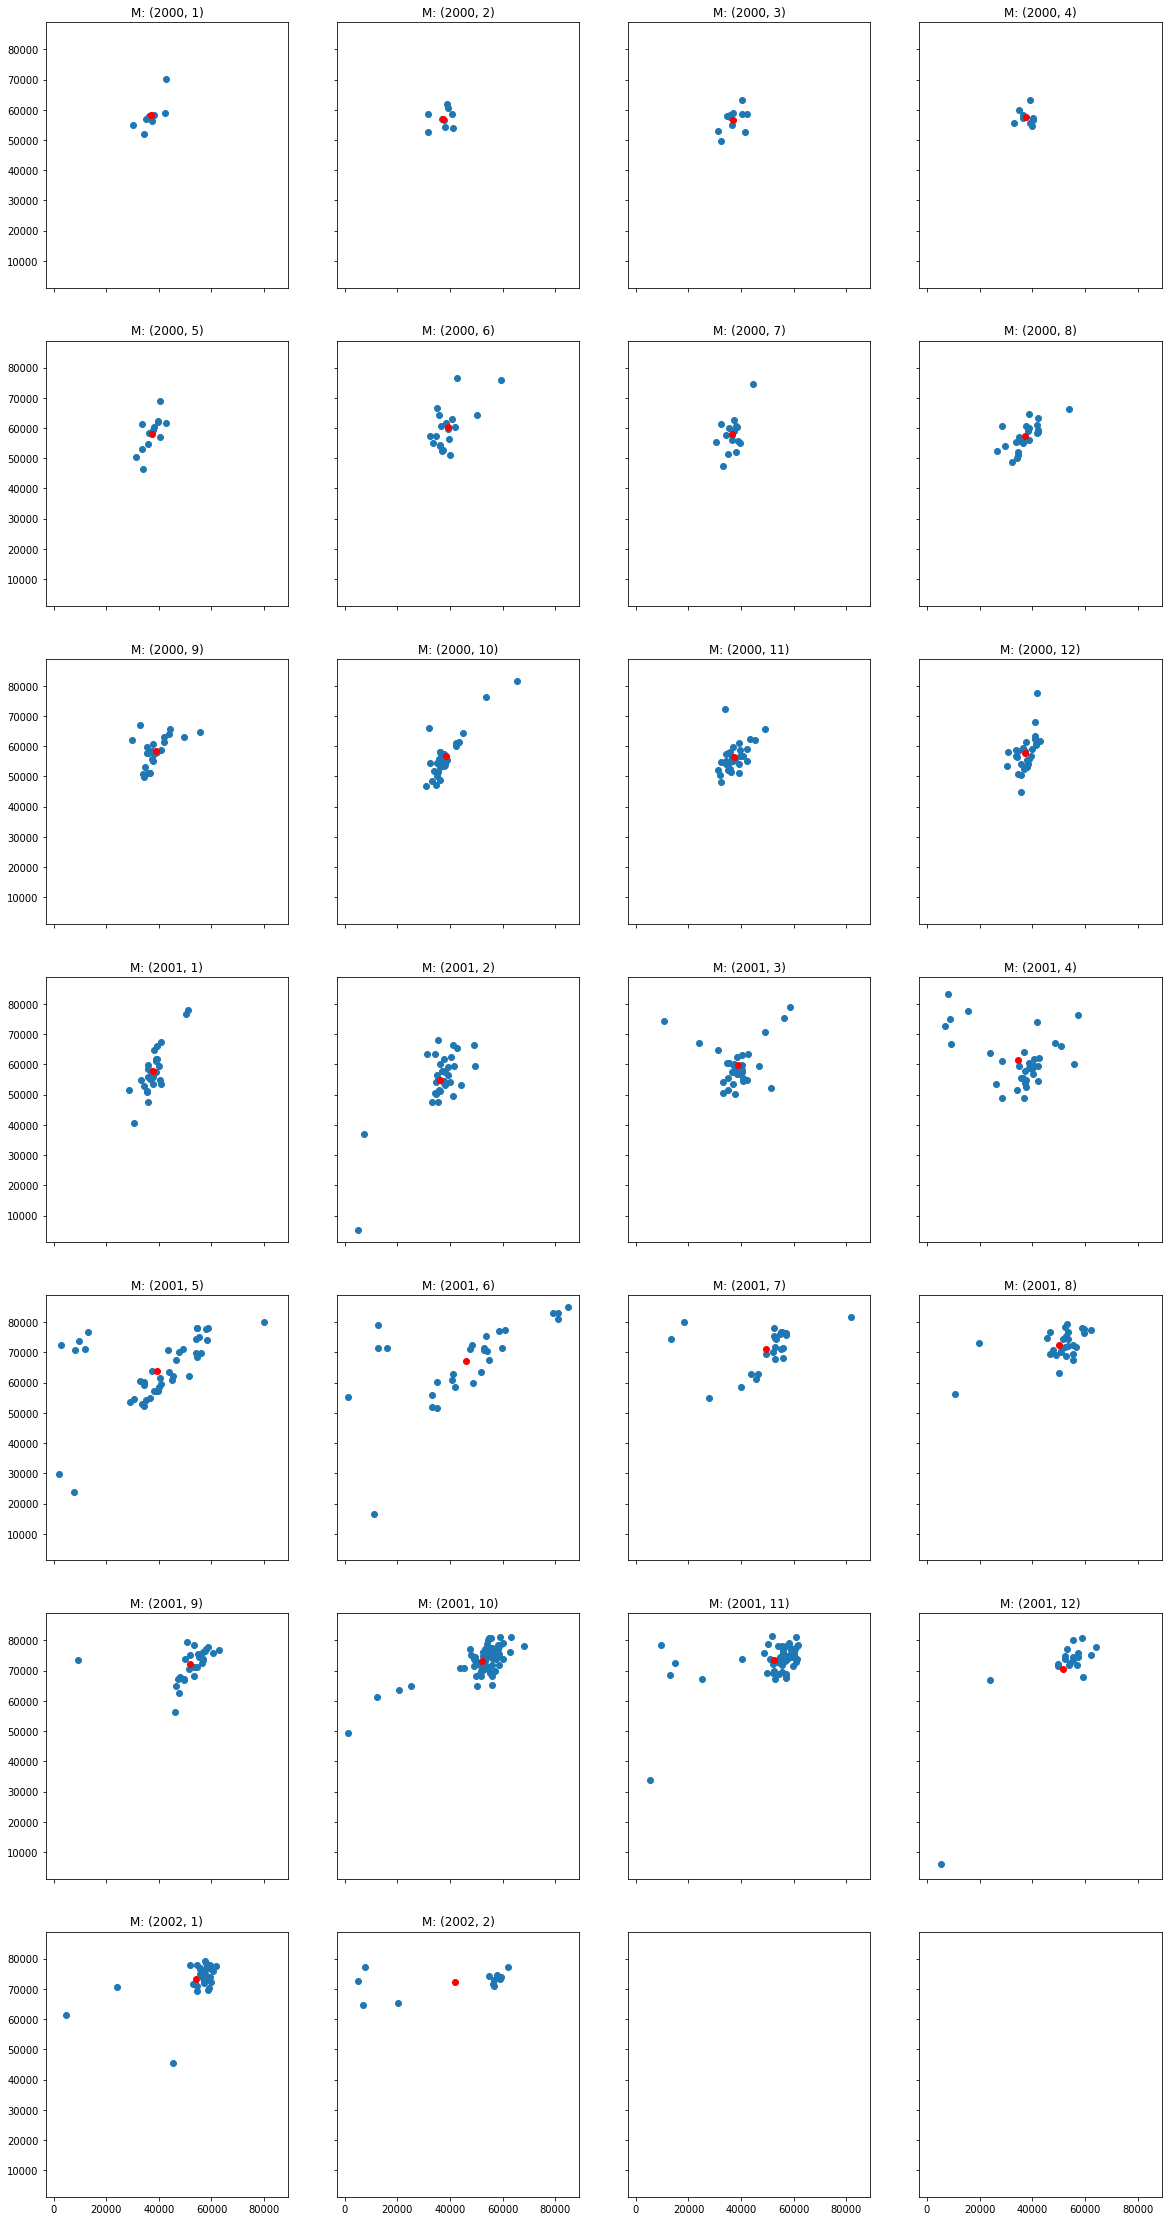

In [16]:
def get_data_for_month2(year, month):
    
    min_no_of_mails = 50 # What is reasonable here? Strange effects when == 1
    
    df_month = df2[(df2["year"] == year) & (df2["month"] == month)]
    grouped_times = df_month.groupby("from")["seconds_since_midnight"].apply(list).reset_index()
    grouped_times["no_mails"] = grouped_times["seconds_since_midnight"].apply(lambda x: len(x))
    grouped_times = grouped_times[grouped_times["no_mails"] > min_no_of_mails]
    grouped_times["25_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .25))
    grouped_times["75_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .75))
    if year == 2000 and month == 1:
        print(grouped_times.head())
    quantiles = grouped_times[["25_quantile", "75_quantile"]]
    return (quantiles, (quantiles["25_quantile"].mean(), quantiles["75_quantile"].mean()))

months = [(2000, 1), (2000, 2), (2000, 3), (2000,  4), (2000,  5), (2000,  6), 
          (2000, 7), (2000, 8), (2000, 9), (2000, 10), (2000, 11), (2000, 12),
          (2001, 1), (2001, 2), (2001, 3), (2001,  4), (2001,  5), (2001,  6), 
          (2001, 7), (2001, 8), (2001, 9), (2001, 10), (2001, 11), (2001, 12),
          (2002, 1), (2002, 2)]
avg_work_times = []

fig, axs = plt.subplots(7, 4, figsize=(20, 40), sharex=True, sharey=True)
for i in range(len(months)):
    row = i // 4
    col = i % 4
    quantiles, avg = get_data_for_month2(*months[i])
    avg_work_times.append(avg)
    axs[row][col].scatter(quantiles["25_quantile"], quantiles["75_quantile"])
    axs[row][col].scatter([avg[0]], [avg[1]], c="red")
    axs[row][col].set_title(f"M: {months[i]}")

plt.show()

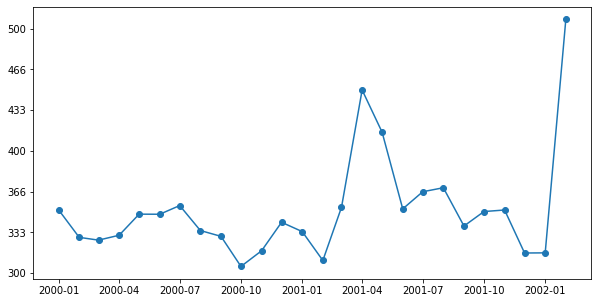

In [17]:
from datetime import datetime
datetime_months = list(map(lambda x: datetime(*x, 1), months))
workday_duration = list(map(lambda x: x[1] - x[0], avg_work_times))

from matplotlib.ticker import FuncFormatter

def seconds_in_minutes(x, pos):
    minutes = x // 60
    return '%d' % (minutes)

formatter = FuncFormatter(seconds_in_minutes)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(datetime_months, workday_duration)
ax.scatter(datetime_months, workday_duration)
ax.yaxis.set_major_formatter(formatter)
plt.show()

Interestingly, there seems to be a slight increase with this dataset. However, the minimum amount of emails a person has to send to count seems to have a significant influence here.

In [14]:
df2[df2["subject"] == "you don't need access to stack manager?"]

,from,to,subject,date,week,year,month,seconds_since_midnight,hour,minute,second
../data/maildir/thomas-p/inbox/33.,daniel.diamond@enron.com,"robert.benson@enron.com, serena.bishop@enron.c...",you don't need access to stack manager?,2002-02-05 15:40:36+00:00,6,2002,2,56436,15,40,36
